In [1]:
! pip install pandas
! pip install numpy
! pip install scikit-learn

In [100]:
!pip install colorama

Importing dependencies 

In [3]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer ##to convert text data into vector
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import colorama
from colorama import Fore,Back,Style
colorama.init(autoreset=True)

CSV to Pandas DF

In [4]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\movies.csv")

In [5]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
df.shape

(4803, 24)

In [7]:
selected_features = ['genres','keywords','tagline','cast','director']
selected_features

['genres', 'keywords', 'tagline', 'cast', 'director']

Data Preprocessing

In [8]:
# replacing the null valuess with empty string

for feature in selected_features:
  df[feature] = df[feature].fillna('')

In [9]:
#combing all the selected_features to make a collection
combined_features=df["genres"]+" "+df["keywords"]+" "+df["tagline"]+" "+df["cast"]+" "+df["director"]

In [10]:
combined_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

Text to feature vector conversion

In [11]:
vectorizer = TfidfVectorizer()

In [12]:
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

**COSINE SIMILARITY** (Helps generate a similarity score)

In [13]:
similarity = cosine_similarity(feature_vectors)
similarity

array([[1.        , 0.07219487, 0.037733  , ..., 0.        , 0.        ,
        0.        ],
       [0.07219487, 1.        , 0.03281499, ..., 0.03575545, 0.        ,
        0.        ],
       [0.037733  , 0.03281499, 1.        , ..., 0.        , 0.05389661,
        0.        ],
       ...,
       [0.        , 0.03575545, 0.        , ..., 1.        , 0.        ,
        0.02651502],
       [0.        , 0.        , 0.05389661, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02651502, 0.        ,
        1.        ]])

**Taking Inputs from the user**

The user is asked to give a movie name which is compared with all the titles in the df. The feature vector to the closest match is used to find a similar match.

In [14]:
movie=input("Enter a movie name: ")

Enter a movie name: twilight


In [15]:
list_of_all_titles = df['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [16]:
# finding the close match for the movie name given by the user
#diflib enables to fetch the closest possible match to the user input from the df (for eg in case of a typo)
find_close_match = difflib.get_close_matches(movie, list_of_all_titles)
print(find_close_match)

['Twilight', 'Flight', 'Spotlight']


In [17]:
# Selectig the first entry from the list 
close_match=find_close_match[0]
close_match

'Twilight'

In [18]:
# finding the index of the movie with title
index_of_the_movie = df[df.title == close_match]['index'].values[0]
print(index_of_the_movie)

1337


In [19]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.0198698261434765), (1, 0.03534350185801997), (2, 0.008079053028587704), (3, 0.0034373814032282314), (4, 0.03205422056569947), (5, 0.03376883864781367), (6, 0.007992421922554609), (7, 0.02183160429708448), (8, 0.02052279159615935), (9, 0.019594731680053736), (10, 0.022348980003036267), (11, 0.07161803508059363), (12, 0.020288107080613287), (13, 0.007279455513607248), (14, 0.05995162461735069), (15, 0.018970727136703332), (16, 0.020701001616585134), (17, 0.12111626654212884), (18, 0.0), (19, 0.03223210379111969), (20, 0.01978735778755663), (21, 0.006627036701910695), (22, 0.03356881626725941), (23, 0.017181584221692983), (24, 0.026673030610753736), (25, 0.036343009700307544), (26, 0.022532114248675513), (27, 0.059407968003461105), (28, 0.007897339791665969), (29, 0.008261793344640148), (30, 0.03285374545643313), (31, 0.021255786478830144), (32, 0.04979298042650116), (33, 0.03863631632968926), (34, 0.026067578892929447), (35, 0.008314956981778966), (36, 0.007492439789224089), (37, 

In [20]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(1337, 1.0000000000000002), (172, 0.44689398239562705), (612, 0.43214383000725476), (898, 0.35415404975867837), (2577, 0.19023367663415675), (1132, 0.18321555212895646), (994, 0.16816560573965142), (2191, 0.16321585527978016), (187, 0.1582445505624008), (2480, 0.15570933228792425), (2333, 0.15364334934076418), (825, 0.14764573855520294), (990, 0.14714847813989498), (912, 0.1470346991952287), (80, 0.1464870385132046), (768, 0.14066273920411307), (1632, 0.13694171325049834), (3538, 0.13664678699753302), (1599, 0.1352849211482896), (960, 0.12996540293221517), (4200, 0.12898275960645447), (3143, 0.1278590450577129), (1714, 0.12727404865315928), (3505, 0.12489219550411593), (17, 0.12111626654212884), (2389, 0.12016849189744602), (2150, 0.11272913688857154), (4388, 0.11059123990008934), (2171, 0.10982398488878513), (2513, 0.10965718348130771), (992, 0.10714922517703669), (821, 0.10669782997245315), (2460, 0.10583255677890271), (1059, 0.105638670110347), (796, 0.10549137182607213), (600, 0.1

In [21]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Twilight
2 . The Twilight Saga: Breaking Dawn - Part 2
3 . The Twilight Saga: Eclipse
4 . The Twilight Saga: New Moon
5 . Tuck Everlasting
6 . Red Riding Hood
7 . Gamer
8 . Capitalism: A Love Story
9 . Puss in Boots
10 . Remember Me
11 . Peggy Sue Got Married
12 . Flightplan
13 . The Scarlet Letter
14 . Interview with the Vampire
15 . Snow White and the Huntsman
16 . Priest
17 . The Next Three Days
18 . Do the Right Thing
19 . The Age of Adaline
20 . The Adventures of Sharkboy and Lavagirl
21 . You Can't Take It With You
22 . You Only Live Twice
23 . Serendipity
24 . Men of War
25 . Pirates of the Caribbean: On Stranger Tides
26 . Renaissance
27 . Eye for an Eye
28 . Hardflip
29 . My Best Friend's Girl


-------------------------------------------------WELCOME TO MOVIE MANIA!-------------------------------------------------------


Movie Mania is a movie recommendation system built over a hollywood movie dataset of over 5000 movies that
recommends the user with their next watch!

Enter a movie name: hunger games


If you enjoyed  hunger games

Here are the top 20 movies you may also like: 

1 . The Hunger Games
2 . The Hunger Games: Mockingjay - Part 2
3 . The Hunger Games: Catching Fire
4 . The Hunger Games: Mockingjay - Part 1
5 . Robin Hood
6 . Red Cliff
7 . Zathura: A Space Adventure
8 . Seabiscuit
9 . Special
10 . Epic
11 . Sleeper
12 . Kingpin
13 . The Helix... Loaded
14 . Detention
15 . A Scanner Darkly
16 . Journey 2: The Mysterious Island
17 . Sheena
18 . Impostor
19 . Hollywood Ending
20 . Bridge to Terabithia


The movies most similar to your taste on the basis of our similarity factor are: 



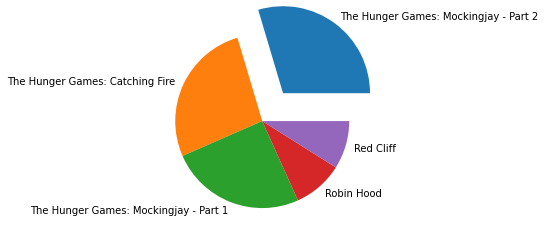

In [23]:
print("-------------------------------------------------WELCOME TO MOVIE MANIA!-------------------------------------------------------\n\n")

print('\033[94m' + "Movie Mania is a movie recommendation system built over a hollywood movie dataset of over 5000 movies that\nrecommends the user with their next watch!")

movie=input("\nEnter a movie name: ")

list_of_all_titles = df['title'].tolist()
find_close_match = difflib.get_close_matches(movie, list_of_all_titles)
close_match=find_close_match[0]

index_of_the_movie = df[df.title == close_match]['index'].values[0]
similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print("\n\nIf you enjoyed ",movie)

print('\033[95m' + '\nHere are the top 20 movies you may also like: \n')
##print('\nMovies suggested for you : \n')

i = 1

label=[]
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<=20):
    print(i, '.',title_from_index)
    label.append(title_from_index)
    i+=1

print("\n")    
print("The movies most similar to your taste on the basis of our similarity factor are: \n")

arr =[]

for i in range(5):
    ele= sorted_similar_movies[i+1][1]
    arr.append(ele*100)

relevance=np.array(arr)

mylabels=[]
for i in range(5):
    mylabels.insert(i, label[i+1])
    
myexplode = [0.4, 0, 0, 0,0]

plt.pie(relevance, labels = mylabels,explode=myexplode)
plt.show() 